In [1]:
!pip install riskfolio-lib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Max Return Portfolio Formula
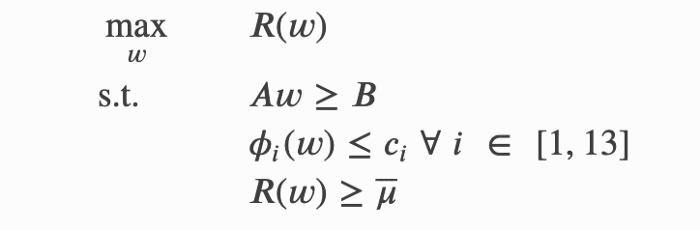

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

In [4]:
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.4%}'.format

In [5]:
#date adjustment

start = '2021-04-30'
end = '2022-05-01'

In [6]:
assets = ['RH', 'APO', 'KKR', 'HCA', 'CTLT', 'RDNT', 'HUN', 
          'SRCL', 'SU', 'GDDY', 'FTNT']

assets.sort()

In [7]:
data = yf.download(assets, start=start, end=end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%***********************]  11 of 11 completed


In [8]:
print(data)

                  APO        CTLT       FTNT       GDDY         HCA  \
Date                                                                  
2021-04-30 5298.2197% 11247.0001% 4084.6001% 8682.0000% 19878.1311%   
2021-05-03 5269.5137% 11177.9999% 4063.6002% 8548.0003% 20219.2215%   
2021-05-04 5262.8159% 10350.0000% 4135.5999% 8241.9998% 20400.1480%   
2021-05-05 5419.7433% 10648.0003% 4187.5999% 8223.9998% 20548.4467%   
2021-05-06 5472.3709% 10618.0000% 4130.1998% 8119.0002% 20695.7596%   
...               ...         ...        ...        ...         ...   
2022-04-25 5362.7857%  9013.9999% 6469.7998% 8741.0004% 20984.2484%   
2022-04-26 5043.3258%  8719.9997% 6129.9999% 8541.9998% 21426.8616%   
2022-04-27 5020.6474%  8826.0002% 6006.3999% 8518.0000% 21156.7078%   
2022-04-28 5157.7003%  8990.0002% 6173.0000% 8733.0002% 21825.6119%   
2022-04-29 4906.2733%  9055.9998% 5780.1998% 8080.9998% 21387.9837%   

                  HUN        KKR       RDNT          RH       SRCL         S

In [9]:
Y = data[assets].pct_change().dropna()

display(Y.head())

,APO,CTLT,FTNT,GDDY,HCA,HUN,KKR,RDNT,RH,SRCL,SU
Date,,,,,,,,,,,
2021-05-03,-0.5418%,-0.6135%,-0.5141%,-1.5434%,1.7159%,3.6624%,-0.5479%,2.4172%,1.6031%,-1.1274%,2.4276%
2021-05-04,-0.1271%,-7.4074%,1.7718%,-3.5798%,0.8948%,3.9367%,-1.1374%,0.4371%,-1.6952%,1.9358%,-0.2279%
2021-05-05,2.9818%,2.8792%,1.2574%,-0.2184%,0.7269%,1.1007%,4.4580%,-2.1323%,-0.8789%,-0.3382%,3.9287%
2021-05-06,0.9710%,-0.2817%,-1.3707%,-1.2767%,0.7169%,-0.0320%,-0.7400%,1.9120%,0.5593%,0.0392%,1.0549%
2021-05-07,1.8010%,1.2997%,2.5471%,-0.1601%,0.5685%,1.2812%,1.8031%,1.5271%,2.3403%,0.4305%,2.7838%


In [10]:
import riskfolio.Portfolio 
import riskfolio as pf

In [11]:
port = pf.Portfolio(returns=Y)

method_mu='hist'
method_cov='hist' 
port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)
model='Classic'
rm = 'MV'
obj = 'Sharpe'
hist = True
rf = 0
l = 0

In [12]:
w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
display(w.T)

,APO,CTLT,FTNT,GDDY,HCA,HUN,KKR,RDNT,RH,SRCL,SU
weights,0.0000%,0.0000%,30.0798%,0.0000%,0.0000%,9.9165%,0.0000%,0.0000%,0.0000%,0.0000%,60.0036%


In [13]:
import riskfolio.PlotFunctions as plf

In [14]:
!pip install --upgrade --force-reinstall matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.5.3-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Using cached Pillow-9.2.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
  Using cached kiwisolver-1.4.4-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.1 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.37.1-py3-none-any.whl (957 kB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Using cached numpy-1.21.6-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Using cached typing_extensions-4.3.0-py3-none-any.whl (25 kB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.3.0
    Uninst

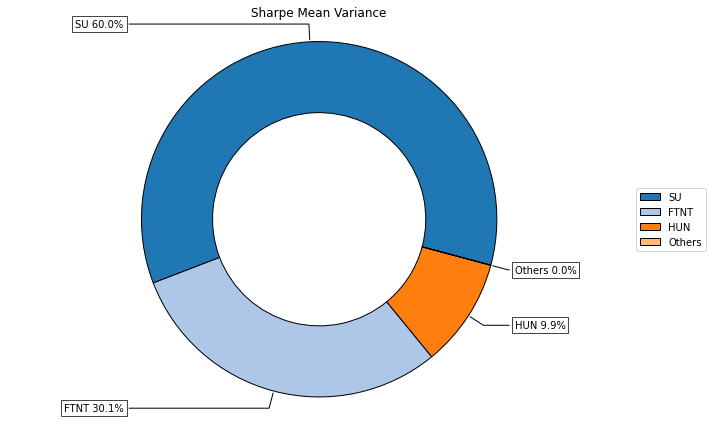

In [15]:
ax = plf.plot_pie(w=w, title='Sharpe Mean Variance', nrow=25, cmap = "tab20", height=6, width=10, ax=None)

In [16]:
points = 50
frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

In [17]:
display(frontier.T.head())

,APO,CTLT,FTNT,GDDY,HCA,HUN,KKR,RDNT,RH,SRCL,SU
0,0.0000%,19.9972%,0.0000%,11.1908%,8.5362%,12.5690%,0.0000%,0.0000%,0.0000%,32.4501%,15.2567%
1,0.0000%,18.6453%,0.0000%,11.9873%,11.7782%,17.2286%,0.0000%,0.0000%,0.0000%,19.5475%,20.8131%
2,0.0000%,17.2042%,1.9030%,11.5322%,12.5760%,18.6347%,0.0000%,0.0000%,0.0000%,15.2961%,22.8539%
3,0.0000%,15.9023%,3.7334%,11.0446%,13.1424%,19.6982%,0.0000%,0.0000%,0.0000%,12.0072%,24.4718%
4,0.0000%,14.7611%,5.3375%,10.6179%,13.6373%,20.6285%,0.0000%,0.0000%,0.0000%,9.1293%,25.8884%


In [18]:
label = 'Max Risk Adjusted Return Portfolio'
mu = port.mu
cov = port.cov
returns = port.returns

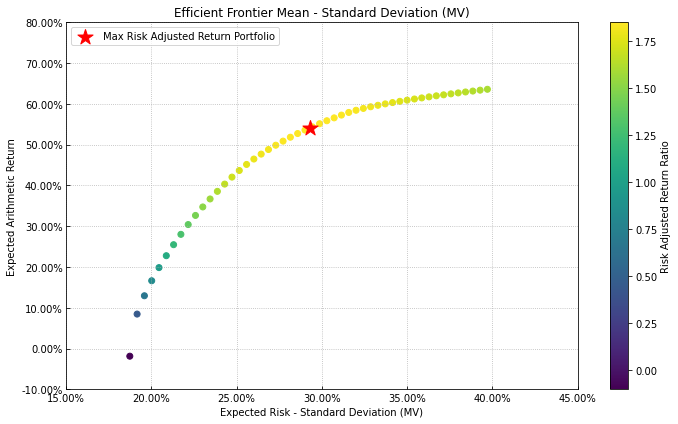

In [19]:
ax = plf.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05, cmap='viridis', w=w, label=label, marker='*', s=16, c='r', height=6, width=10, ax=None)

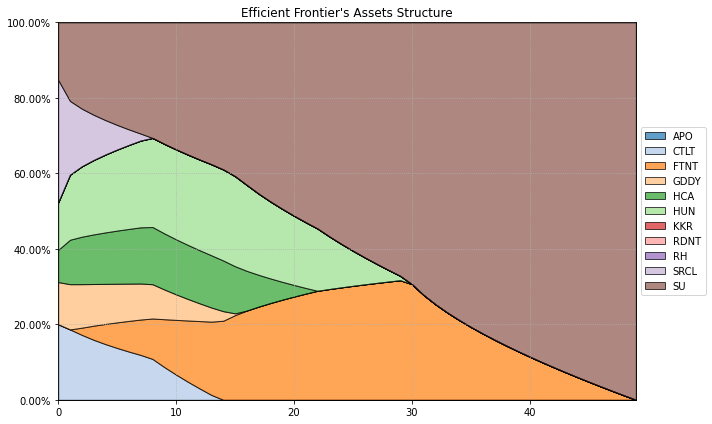

In [20]:
ax = plf.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

In [21]:
rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR', 'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']
w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)

w_s.columns = rms
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
APO,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CTLT,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
FTNT,30.08%,30.39%,28.26%,29.36%,27.85%,18.68%,25.26%,38.21%,40.98%,33.43%,46.11%,37.36%,42.04%
GDDY,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
HCA,0.00%,5.51%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,16.56%,0.00%,12.38%,1.26%
HUN,9.92%,1.11%,4.26%,0.00%,4.90%,0.04%,20.89%,10.63%,0.00%,2.43%,0.00%,0.30%,0.00%
KKR,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
RDNT,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
RH,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
SRCL,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


In [22]:
import matplotlib.pyplot as plt

<AxesSubplot:>

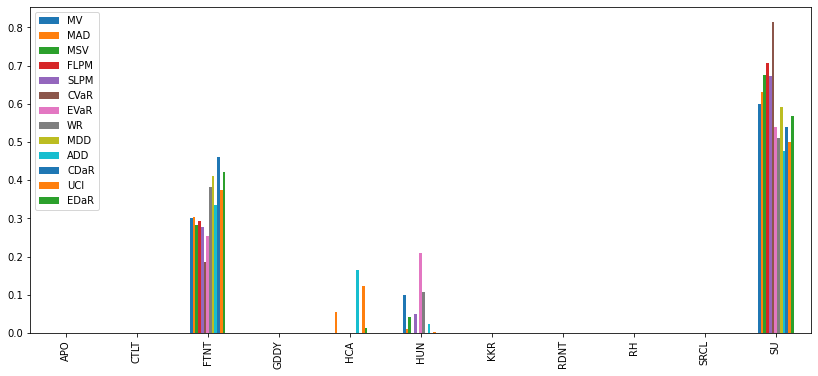

In [23]:
fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)

In [ ]:
#https://medium.com/@orenji.eirl/riskfolio-lib-portfolio-optimization-with-python-650c6223e8b1

#change arbitrary timeset for better result. 